# Phase 3 Project
- author: Jonathan Holt
- Flatiron Data Science
- 7/19/21 Cohort

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.set_option('display.max_rows', 1000) #change the amount of rows displayed
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Fixing column names

In [4]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

# Inital Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

## 2/18/22

In [6]:
churned_df_base = df[df["churn"] == 1]
stayed_df_base = df[df["churn"] == 0]

In [7]:
churned_df_base.sort_values('total_day_minutes', ascending=False)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True
975,DE,129,510,332-6181,no,no,0,334.3,118,56.83,...,104,16.33,191.0,83,8.59,10.4,6,2.81,0,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
1679,OK,82,510,393-4823,no,no,0,329.8,73,56.07,...,120,17.71,267.1,102,12.02,10.6,6,2.86,0,True
2028,SD,93,510,408-4836,no,no,0,328.1,106,55.78,...,89,12.89,303.5,114,13.66,8.7,3,2.35,1,True
197,TX,208,510,378-3625,no,no,0,326.5,67,55.51,...,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True


In [8]:
#stayed_df_base['customer_service_calls'].value_counts()

In [9]:
#churned_df_base[.value_counts()

In [10]:
#df.describe()

In [11]:
#df.isna().sum()

In [12]:
#df.churn.value_counts()

In [13]:
#df['number_vmail_messages'].value_counts()

## Visualization of Class Imbalance

<AxesSubplot:xlabel='churn'>

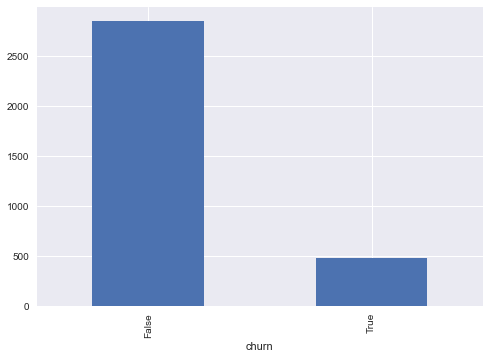

In [14]:
df.pivot_table(index='churn', aggfunc='size').plot(kind='bar')

# Cleaning and Preprocessing

In [15]:
#df.head()

In [16]:
test_df = df.copy()
test_df.head(2)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


## Changing False to 0 and True to 1

In [17]:
test_df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [18]:
test_df["churn"] = test_df["churn"].astype(int)

In [19]:
test_df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [20]:
#test_df = test_df.drop(columns=['state', 'phone_number', 'international_plan', 'voice_mail_plan'], axis=1)
test_df = test_df.drop(columns=['state','phone_number', 'area_code'], axis=1)

In [21]:
test_df.head(1)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


## Slicing out object type Features

In [22]:
cont_features = [col for col in test_df.columns if test_df[col].dtype in [np.float64, np.int64]]

In [23]:
cont_features

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'churn']

In [24]:
feature_df = test_df.loc[:, cont_features]
#X_test_cat = X_test.loc[:, features_cat]
feature_df

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [25]:
#need_to_encode = test_df[['area_code', 'customer_service_calls']]
need_to_encode = test_df[['international_plan', 'voice_mail_plan', 'customer_service_calls', 'churn']]

In [26]:
#IMPORTANT!
#Added 2/16 4PM. 
#feature_df = feature_df.drop(need_to_encode, axis=1)
#feature_df = feature_df.drop(['area_code', 'customer_service_calls'], axis=1)
#feature_df = feature_df.drop(['customer_service_calls'], axis=1)
#feature_df

## One Hot Encoding

In [27]:
ohe = OneHotEncoder()
ohe.fit(need_to_encode)

ohe_1 = ohe.transform(need_to_encode).toarray()

ohe_df = pd.DataFrame(ohe_1, columns=ohe.get_feature_names(need_to_encode.columns))
ohe_df.head()

,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3,customer_service_calls_4,customer_service_calls_5,customer_service_calls_6,customer_service_calls_7,customer_service_calls_8,customer_service_calls_9,churn_0,churn_1
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Dropping one value for categoricals

In [28]:
#IMPORTANT
#Dropping a few of the redundant values.
ohe_df = ohe_df.drop(['international_plan_no', 'voice_mail_plan_no', 'churn_0'], axis=1)
ohe_df.head()

,international_plan_yes,voice_mail_plan_yes,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3,customer_service_calls_4,customer_service_calls_5,customer_service_calls_6,customer_service_calls_7,customer_service_calls_8,customer_service_calls_9,churn_1
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#cs_calls_1_2_3_df=ohe_df[['customer_service_calls_1', 'customer_service_calls_2',
#                          'customer_service_calls_3']]

In [30]:
#cs_calls_1_2_3 = ohe_df.apply(lambda x: x['customer_service_calls_1'] + x['customer_service_calls_2']
#                              + x['customer_service_calls_3'], axis=1)
#cs_calls_4_5_6 = ohe_df.apply(lambda x: x['customer_service_calls_4'] + x['customer_service_calls_5']
#                              + x['customer_service_calls_6'], axis=1)
#cs_calls_7_8_9 = ohe_df.apply(lambda x: x['customer_service_calls_7'] + x['customer_service_calls_8']
#                              + x['customer_service_calls_9'], axis=1)

#ohe_df['cs_calls_1_2_3'] = cs_calls_1_2_3
#ohe_df['cs_calls_4_5_6'] = cs_calls_4_5_6
#ohe_df['cs_calls_7_8_9'] = cs_calls_7_8_9
#ohe_df.head()

In [31]:
cs_calls_low = ohe_df.apply(lambda x: x['customer_service_calls_0']+ x['customer_service_calls_1'] + x['customer_service_calls_2']
                              + x['customer_service_calls_3'], axis=1)
cs_calls_high= ohe_df.apply(lambda x: x['customer_service_calls_4'] + x['customer_service_calls_5']
                              + x['customer_service_calls_6'] + x['customer_service_calls_7']
                            + x['customer_service_calls_8']+ x['customer_service_calls_9'], axis=1)

ohe_df['cs_calls_low'] = cs_calls_low
ohe_df['cs_calls_high'] = cs_calls_high

In [32]:
ohe_df = ohe_df.drop(['customer_service_calls_1','customer_service_calls_2','customer_service_calls_3',
                     'customer_service_calls_4','customer_service_calls_5','customer_service_calls_6',
                     'customer_service_calls_7','customer_service_calls_8','customer_service_calls_9']
                    , axis=1)
ohe_df.head()

,international_plan_yes,voice_mail_plan_yes,customer_service_calls_0,churn_1,cs_calls_low,cs_calls_high
0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0


In [33]:
#2/22
#dropping cs_calls_low as it is redundant since this is now a binary choice.
ohe_df = ohe_df.drop(['cs_calls_low', 'customer_service_calls_0'], axis=1)

In [34]:
# Combining everything together

cleaned_df = pd.concat([pd.DataFrame(feature_df), ohe_df], axis=1)

In [35]:
model_df = cleaned_df.copy()

In [36]:
model_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_yes,voice_mail_plan_yes,churn_1,cs_calls_high
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.0,1.0,0.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1.0,0.0,0.0,0.0


In [37]:
#2/22 4:30PM
#dropping all charge columns as they are likely correlated with minutes used
#if this proves to be true, find a way to plot and show the correlation
model_df = model_df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge',
                             'total_intl_charge'], axis=1)

In [38]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   number_vmail_messages   3333 non-null   int64  
 2   total_day_minutes       3333 non-null   float64
 3   total_day_calls         3333 non-null   int64  
 4   total_eve_minutes       3333 non-null   float64
 5   total_eve_calls         3333 non-null   int64  
 6   total_night_minutes     3333 non-null   float64
 7   total_night_calls       3333 non-null   int64  
 8   total_intl_minutes      3333 non-null   float64
 9   total_intl_calls        3333 non-null   int64  
 10  customer_service_calls  3333 non-null   int64  
 11  churn                   3333 non-null   int64  
 12  international_plan_yes  3333 non-null   float64
 13  voice_mail_plan_yes     3333 non-null   float64
 14  churn_1                 3333 non-null   

In [39]:
#Dropping the categories that are now duplicates
model_df = model_df.drop(['churn', 'customer_service_calls'], axis=1)
model_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,international_plan_yes,voice_mail_plan_yes,churn_1,cs_calls_high
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,0.0,1.0,0.0,0.0
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,0.0,1.0,0.0,0.0
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0.0,0.0,0.0,0.0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,1.0,0.0,0.0,0.0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,1.0,0.0,0.0,0.0


In [40]:
#X = cleaned_df.drop(['churn'], axis=1)
X = model_df.drop(['churn_1'], axis=1)
#X = test_df[['area_code', 'international_plan', 'voice_mail_plan', 'customer_service_calls' ]]
#y = cleaned_df['churn']
y = model_df['churn_1']

# Initial Modeling (no SMOTE)

## Train-Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=23)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 2486 to 512
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          2499 non-null   int64  
 1   number_vmail_messages   2499 non-null   int64  
 2   total_day_minutes       2499 non-null   float64
 3   total_day_calls         2499 non-null   int64  
 4   total_eve_minutes       2499 non-null   float64
 5   total_eve_calls         2499 non-null   int64  
 6   total_night_minutes     2499 non-null   float64
 7   total_night_calls       2499 non-null   int64  
 8   total_intl_minutes      2499 non-null   float64
 9   total_intl_calls        2499 non-null   int64  
 10  international_plan_yes  2499 non-null   float64
 11  voice_mail_plan_yes     2499 non-null   float64
 12  cs_calls_high           2499 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 273.3 KB


## Decision Tree 1 (Baseline Decision Tree)

In [43]:
dtree_1 = DecisionTreeClassifier(random_state=23)

dtree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [44]:
dt1_y_pred = dtree_1.predict(X_test)

### Evaluating Decision Tree 1

In [45]:
# Calculate Classification Metrics

dt1_acc = accuracy_score(y_test, dt1_y_pred) * 100
print('DTree 1 Accuracy is :{0}'.format(dt1_acc))
dt1_prec = precision_score(y_test, dt1_y_pred) * 100
print('DTree 1 Precision is :{0}'.format(dt1_prec))
dt1_rcl = recall_score(y_test, dt1_y_pred) * 100
print('DTree 1 Recall is :{0}'.format(dt1_rcl))
dt1_f1 = f1_score(y_test, dt1_y_pred) * 100
print('DTree 1 F1 Score is :{0}'.format(dt1_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt1_y_pred)
dt1_roc_auc = auc(false_positive_rate, true_positive_rate)
print('DTree 1 AUC is :{0}'.format(round(dt1_roc_auc, 2)))
print('DTree 1 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, dt1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

DTree 1 Accuracy is :91.72661870503596
DTree 1 Precision is :72.80701754385966
DTree 1 Recall is :68.59504132231406
DTree 1 F1 Score is :70.63829787234044
DTree 1 AUC is :0.82
DTree 1 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,682,31,713
1.0,38,83,121
All,720,114,834


In [46]:
#dt1_acc = precision_score(y_test, dt1_y_pred) * 100
#print('DTree 1 Precision is :{0}'.format(dt1_acc))

In [47]:
# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt1_y_pred)
#dt1_roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\n DTree 1 AUC is :{0}'.format(round(dt1_roc_auc, 2)))

In [48]:
# Create and print a confusion matrix 
#print('\n DTree 1 Confusion Matrix')
#print('----------------')
#pd.crosstab(y_test, dt1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

### Analysis of Accuracy, AUC, and Confusion Matrix
- Analysis goes HERE
- AND HERE
- AND HERE!

In [49]:
#dt1_cv_score = cross_val_score(dtree_1, X_train, y_train, cv=3)
#mean_dt1_cv_score = np.mean(dt1_cv_score)

#print(f"DTree 1 Mean Cross Validation Score: {mean_dt1_cv_score :.2%}")

## GridSearchCV & Decision Tree 2

In [50]:
#2/22 added class weight parameter
dtree_2 = DecisionTreeClassifier(random_state=23, class_weight="balanced")

In [51]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [52]:
# Instantiate GridSearchCV
#dt2_grid_search = GridSearchCV(dtree_2, dt_param_grid, cv=3, scoring = 'recall', return_train_score=True)
dt2_grid_search = GridSearchCV(dtree_2, dt_param_grid, cv=3, scoring = 'f1', return_train_score=True)

# Fit to the data
dt2_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='f1')

In [53]:
# Mean training score
dt2_gs_training_score = np.mean(dt2_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt2_gs_testing_score = dt2_grid_search.score(X_test, y_test)

print(f"DTree 2 Mean Training Score: {dt2_gs_training_score :.2%}")
print(f"DTree 2 Mean Test Score: {dt2_gs_testing_score :.2%}")
print("DTree 2 Best Parameter Combination Found During Grid Search:")
dt2_grid_search.best_params_

DTree 2 Mean Training Score: 69.90%
DTree 2 Mean Test Score: 76.61%
DTree 2 Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

### Decision Tree 2

In [54]:
dtree_2 = DecisionTreeClassifier(criterion='entropy', 
                           max_depth=5,
                          min_samples_split=2,
                           min_samples_leaf=3,
                            random_state=23)

In [55]:
#dtree_2 = DecisionTreeClassifier(criterion='gini', 
#                           max_depth=3,
#                           min_samples_split=2,
#                           min_samples_leaf=1,
#                            random_state=23)

In [56]:
dtree_2.fit(X_train, y_train)
dt2_y_pred = dtree_2.predict(X_test)

### Evaluating Decision Tree 2

In [57]:
# Calculate Classification Metrics

dt2_acc = accuracy_score(y_test, dt2_y_pred) * 100
print('DTree 2 Accuracy is :{0}'.format(dt2_acc))
dt2_prec = precision_score(y_test, dt2_y_pred) * 100
print('DTree 2 Precision is :{0}'.format(dt2_prec))
dt2_rcl = recall_score(y_test, dt2_y_pred) * 100
print('DTree 2 Recall is :{0}'.format(dt2_rcl))
dt2_f1 = f1_score(y_test, dt1_y_pred) * 100
print('DTree 2 F1 Score is :{0}'.format(dt2_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt2_y_pred)
dt2_roc_auc = auc(false_positive_rate, true_positive_rate)
print('DTree 2 AUC is :{0}'.format(round(dt2_roc_auc, 2)))
print('DTree 2 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, dt2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

DTree 2 Accuracy is :93.4052757793765
DTree 2 Precision is :83.6734693877551
DTree 2 Recall is :67.76859504132231
DTree 2 F1 Score is :70.63829787234044
DTree 2 AUC is :0.83
DTree 2 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,697,16,713
1.0,39,82,121
All,736,98,834


In [58]:
# Calculate accuracy 
#dt2_acc = accuracy_score(y_test,dt2_y_pred) * 100
#print('DTree 2 Accuracy is :{0}'.format(dt2_acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt2_y_pred)
#dt2_roc_auc = auc(false_positive_rate, true_positive_rate)
#print('DTree 2 AUC is :{0}'.format(round(dt2_roc_auc, 2)))

# Create and print a confusion matrix 
#print('DTree 2 Confusion Matrix')
#print('----------------')
#pd.crosstab(y_test, dt2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

### Analysis of Accuracy, AUC, and Confusion Matrix
- Analysis goes HERE
- AND HERE
- AND HERE!

## Random Forests 1

In [59]:
rf1_clf = RandomForestClassifier(random_state=23, class_weight="balanced")
mean_rf1_cv_score = np.mean(cross_val_score(rf1_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf1_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 92.56%


In [60]:
rf1_clf.fit(X_train, y_train)
rf1_y_pred = rf1_clf.predict(X_test)
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,rf1_y_pred)
#rf1_roc_auc = auc(false_positive_rate, true_positive_rate)
#rf1_roc_auc
#print(f"Random Forests 1 AUC Score: {rf1_roc_auc :.2%}")

### Evaluating Random Forests 1

In [61]:
# Calculate Classification Metrics

rf1_acc = accuracy_score(y_test, rf1_y_pred) * 100
print('Random Forests 1 Accuracy is :{0}'.format(rf1_acc))
rf1_prec = precision_score(y_test, rf1_y_pred) * 100
print('Random Forests 1 Precision is :{0}'.format(rf1_prec))
rf1_rcl = recall_score(y_test, rf1_y_pred) * 100
print('Random Forests 1 Recall is :{0}'.format(rf1_rcl))
rf1_f1 = f1_score(y_test, rf1_y_pred) * 100
print('Random Forests 1 F1 Score is :{0}'.format(rf1_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf1_y_pred)
rf1_roc_auc = auc(false_positive_rate, true_positive_rate)
print('Random Forests 1 AUC is :{0}'.format(round(rf1_roc_auc, 2)))
print('Random Forests 1 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, rf1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Random Forests 1 Accuracy is :94.24460431654677
Random Forests 1 Precision is :96.20253164556962
Random Forests 1 Recall is :62.8099173553719
Random Forests 1 F1 Score is :76.00000000000001
Random Forests 1 AUC is :0.81
Random Forests 1 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,710,3,713
1.0,45,76,121
All,755,79,834


In [62]:
# Calculate accuracy 
#rf1_acc = accuracy_score(y_test,rf1_y_pred) * 100
#print('Random Forests 1 Accuracy is :{0}'.format(rf1_acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf1_y_pred)
#rf1_roc_auc = auc(false_positive_rate, true_positive_rate)
#print('Random Forests 1 AUC is :{0}'.format(round(rf1_roc_auc, 2)))

# Create and print a confusion matrix 
#print('Random Forests Confusion Matrix')
#print('----------------')
#pd.crosstab(y_test, rf1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

## GridSearch_CV & Random Forests 2

In [63]:
rf2_clf = RandomForestClassifier(random_state=23, class_weight="balanced")

In [64]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [65]:
#rf2_grid_search = GridSearchCV(rf2_clf, rf_param_grid, scoring = 'recall', cv=3)
rf2_grid_search = GridSearchCV(rf2_clf, rf_param_grid, scoring = 'f1', cv=3)
rf2_grid_search.fit(X_train, y_train)

print(f"Random Forest 2 Training Accuracy: {rf2_grid_search.best_score_ :.2%}")
print("")
# Mean test score
rf2_gs_testing_score = rf2_grid_search.score(X_test, y_test)
print("")
print(f"Random Forest 2 Optimal Parameters: {rf2_grid_search.best_params_}")

Random Forest 2 Training Accuracy: 78.88%


Random Forest 2 Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [66]:
print(f"Random Forests 2 Mean Test Score: {rf2_gs_testing_score :.2%}")

Random Forests 2 Mean Test Score: 81.58%


In [67]:
rf2_clf = RandomForestClassifier(criterion= 'entropy',
                                max_depth= 10,
                                min_samples_leaf= 3,
                                min_samples_split= 10,
                                n_estimators= 100)

mean_rf2_cv_score = np.mean(cross_val_score(rf2_clf, X_train, y_train, cv=3))

print(f"Random Forests 2 Mean Cross Validation Score: {mean_rf2_cv_score :.2%}")

Random Forests 2 Mean Cross Validation Score: 93.04%


In [68]:
#rf2_clf = RandomForestClassifier(criterion= 'gini',
#                                max_depth= None,
#                                min_samples_leaf= 3,
#                                min_samples_split= 5,
#                                n_estimators= 100)

#mean_rf2_cv_score = np.mean(cross_val_score(rf2_clf, X_train, y_train, cv=3))

#print(f"Random Forests 2 Mean Cross Validation Score: {mean_rf2_cv_score :.2%}")

In [69]:
rf2_clf.fit(X_train, y_train)
rf2_y_pred = rf2_clf.predict(X_test)
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,rf2_y_pred)
#rf2_roc_auc = auc(false_positive_rate, true_positive_rate)
#rf2_roc_auc
#print(f"Random Forests 2 AUC Score: {rf2_roc_auc :.2%}")

### Evaluating Random Forests 2

In [70]:
# Calculate Classification Metrics

rf2_acc = accuracy_score(y_test, rf2_y_pred) * 100
print('Random Forests 2 Accuracy is :{0}'.format(rf2_acc))
rf2_prec = precision_score(y_test, rf2_y_pred) * 100
print('Random Forests 2 Precision is :{0}'.format(rf2_prec))
rf2_rcl = recall_score(y_test, rf2_y_pred) * 100
print('Random Forests 2 Recall is :{0}'.format(rf2_rcl))
rf2_f1 = f1_score(y_test, rf2_y_pred) * 100
print('Random Forests 2 F1 Score is :{0}'.format(rf2_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf2_y_pred)
rf2_roc_auc = auc(false_positive_rate, true_positive_rate)
print('Random Forests 2 AUC is :{0}'.format(round(rf2_roc_auc, 2)))
print('Random Forests 2 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, rf2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Random Forests 2 Accuracy is :94.36450839328538
Random Forests 2 Precision is :96.25
Random Forests 2 Recall is :63.63636363636363
Random Forests 2 F1 Score is :76.61691542288558
Random Forests 2 AUC is :0.82
Random Forests 2 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,710,3,713
1.0,44,77,121
All,754,80,834


In [71]:
# Calculate accuracy 
#rf2_acc = accuracy_score(y_test,rf2_y_pred) * 100
#print('Random Forests 2 Accuracy is :{0}'.format(rf2_acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf2_y_pred)
#rf2_roc_auc = auc(false_positive_rate, true_positive_rate)
#print('Random Forests 2 AUC is :{0}'.format(round(rf2_roc_auc, 2)))

# Create and print a confusion matrix 
#print('Random Forests 2 Confusion Matrix')
#print('----------------')
#pd.crosstab(y_test, rf2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [72]:
#dt2_score = dt2_grid_search.score(X_test, y_test)
#rf2_score = rf2_grid_search.score(X_test, y_test)

#print('Decision tree 2 grid search Score: ', dt2_score)
#print('Random forest 2 grid search Score: ', rf2_score)

# Modeling with Synthetic Samples (SMOTE)

In [73]:
balanced_df = cleaned_df.copy()
balanced_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_yes,voice_mail_plan_yes,churn_1,cs_calls_high
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.0,1.0,0.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1.0,0.0,0.0,0.0


In [74]:
X = balanced_df.drop(['churn_1'], axis=1)
y = balanced_df['churn_1']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=23)

In [76]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

## Decision Tree 3

In [77]:
dtree_3 = DecisionTreeClassifier(random_state=23)

dtree_3.fit(X_train_resampled, y_train_resampled)
dt3_y_pred = dtree_3.predict(X_test)

In [78]:
# Calculate Classification Metrics

dt3_acc = accuracy_score(y_test, dt3_y_pred) * 100
print('DTree 3 Accuracy is :{0}'.format(dt3_acc))
dt3_prec = precision_score(y_test, dt3_y_pred) * 100
print('DTree 3 Precision is :{0}'.format(dt3_prec))
dt3_rcl = recall_score(y_test, dt3_y_pred) * 100
print('DTree 3 Recall is :{0}'.format(dt3_rcl))
dt3_f1 = f1_score(y_test, dt3_y_pred) * 100
print('DTree 3 F1 Score is :{0}'.format(dt3_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt3_y_pred)
dt3_roc_auc = auc(false_positive_rate, true_positive_rate)
print('DTree 3 AUC is :{0}'.format(round(dt3_roc_auc, 2)))
print('DTree 3 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, dt3_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

DTree 3 Accuracy is :100.0
DTree 3 Precision is :100.0
DTree 3 Recall is :100.0
DTree 3 F1 Score is :100.0
DTree 3 AUC is :1.0
DTree 3 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,713,0,713
1.0,0,121,121
All,713,121,834


## GridSearchCV

In [79]:
dt3_grid_search = GridSearchCV(dtree_3, dt_param_grid, cv=3, scoring = 'f1', return_train_score=True)
# Fit to the data
dt3_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='f1')

In [80]:
# Mean training score
dt3_gs_training_score = np.mean(dt3_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt3_gs_testing_score = dt3_grid_search.score(X_test, y_test)

print(f"DTree 3 Mean Training Score: {dt3_gs_training_score :.2%}")
print(f"DTree 3 Mean Test Score: {dt3_gs_testing_score :.2%}")
print("DTree 3 Best Parameter Combination Found During Grid Search:")
dt3_grid_search.best_params_

DTree 3 Mean Training Score: 100.00%
DTree 3 Mean Test Score: 100.00%
DTree 3 Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

## Decision Tree 4

In [81]:
dtree_4 = DecisionTreeClassifier(criterion='entropy', 
                           max_depth=None,
                          min_samples_split=5,
                           min_samples_leaf=1,
                            random_state=23)

In [82]:
dtree_4.fit(X_train_resampled, y_train_resampled)
dt4_y_pred = dtree_4.predict(X_test)

In [83]:
# Calculate Classification Metrics

dt4_acc = accuracy_score(y_test, dt4_y_pred) * 100
print('DTree 4 Accuracy is :{0}'.format(dt4_acc))
dt4_prec = precision_score(y_test, dt3_y_pred) * 100
print('DTree 4 Precision is :{0}'.format(dt4_prec))
dt4_rcl = recall_score(y_test, dt4_y_pred) * 100
print('DTree 4 Recall is :{0}'.format(dt4_rcl))
dt4_f1 = f1_score(y_test, dt4_y_pred) * 100
print('DTree 4 F1 Score is :{0}'.format(dt4_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt4_y_pred)
dt4_roc_auc = auc(false_positive_rate, true_positive_rate)
print('DTree 4 AUC is :{0}'.format(round(dt4_roc_auc, 2)))
print('DTree 4 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, dt4_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

DTree 4 Accuracy is :100.0
DTree 4 Precision is :100.0
DTree 4 Recall is :100.0
DTree 4 F1 Score is :100.0
DTree 4 AUC is :1.0
DTree 4 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,713,0,713
1.0,0,121,121
All,713,121,834


## Random Forests 3

In [84]:
rf3_clf = RandomForestClassifier(random_state=23, class_weight="balanced")

In [85]:
#rf2_grid_search = GridSearchCV(rf2_clf, rf_param_grid, scoring = 'recall', cv=3)
rf3_grid_search = GridSearchCV(rf3_clf, rf_param_grid, scoring = 'f1', cv=3)
rf3_grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Random Forest 3 Training Accuracy: {rf3_grid_search.best_score_ :.2%}")
print("")
# Mean test score
rf3_gs_testing_score = rf3_grid_search.score(X_test, y_test)
print("")
print(f"Random Forest 3 Optimal Parameters: {rf3_grid_search.best_params_}")

Random Forest 3 Training Accuracy: 100.00%


Random Forest 3 Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 10}


In [86]:
rf3_clf = RandomForestClassifier(criterion= 'entropy',
                                max_depth= None,
                                min_samples_leaf= 3,
                                min_samples_split= 5,
                                n_estimators= 30)

mean_rf3_cv_score = np.mean(cross_val_score(rf3_clf, X_train_resampled, y_train_resampled, cv=3))

print(f"Random Forests 3 Mean Cross Validation Score: {mean_rf3_cv_score :.2%}")

Random Forests 3 Mean Cross Validation Score: 100.00%


In [87]:
rf3_clf.fit(X_train_resampled, y_train_resampled)
rf3_y_pred = rf3_clf.predict(X_test)

In [88]:
# Calculate Classification Metrics

rf3_acc = accuracy_score(y_test, rf3_y_pred) * 100
print('Random Forests 3 Accuracy is :{0}'.format(rf3_acc))
rf3_prec = precision_score(y_test, rf3_y_pred) * 100
print('Random Forests 3 Precision is :{0}'.format(rf3_prec))
rf3_rcl = recall_score(y_test, rf3_y_pred) * 100
print('Random Forests 3 Recall is :{0}'.format(rf3_rcl))
rf3_f1 = f1_score(y_test, rf3_y_pred) * 100
print('Random Forests 3 F1 Score is :{0}'.format(rf3_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf3_y_pred)
rf3_roc_auc = auc(false_positive_rate, true_positive_rate)
print('Random Forests 3 AUC is :{0}'.format(round(rf3_roc_auc, 2)))
print('Random Forests 3 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, rf3_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Random Forests 3 Accuracy is :100.0
Random Forests 3 Precision is :100.0
Random Forests 3 Recall is :100.0
Random Forests 3 F1 Score is :100.0
Random Forests 3 AUC is :1.0
Random Forests 3 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,713,0,713
1.0,0,121,121
All,713,121,834


# Comparisons

In [89]:
#Recall
print('DTree 1 Recall is :{0}'.format(dt1_rcl))
print('DTree 2 Recall is :{0}'.format(dt2_rcl))
print('DTree 3 Recall is :{0}'.format(dt3_rcl))
print('DTree 4 Recall is :{0}'.format(dt4_rcl))
print('Random Forests 1 Recall is :{0}'.format(rf1_rcl))
print('Random Forests 2 Recall is :{0}'.format(rf2_rcl))
print('Random Forests 3 Recall is :{0}'.format(rf3_rcl))

DTree 1 Recall is :68.59504132231406
DTree 2 Recall is :67.76859504132231
DTree 3 Recall is :100.0
DTree 4 Recall is :100.0
Random Forests 1 Recall is :62.8099173553719
Random Forests 2 Recall is :63.63636363636363
Random Forests 3 Recall is :100.0


In [90]:
#Precision
print('DTree 1 Precision is :{0}'.format(dt1_prec))
print('DTree 2 Precision is :{0}'.format(dt2_prec))
print('DTree 3 Precision is :{0}'.format(dt3_prec))
print('DTree 4 Precision is :{0}'.format(dt4_prec))
print('Random Forests 1 Precision is :{0}'.format(rf1_prec))
print('Random Forests 2 Precision is :{0}'.format(rf2_prec))
print('Random Forests 3 Precision is :{0}'.format(rf3_prec))

DTree 1 Precision is :72.80701754385966
DTree 2 Precision is :83.6734693877551
DTree 3 Precision is :100.0
DTree 4 Precision is :100.0
Random Forests 1 Precision is :96.20253164556962
Random Forests 2 Precision is :96.25
Random Forests 3 Precision is :100.0


In [91]:
#F1 Score
print('DTree 1 F1 Score is :{0}'.format(dt1_f1))
print('DTree 2 F1 Score is :{0}'.format(dt2_f1))
print('DTree 3 F1 Score is :{0}'.format(dt3_f1))
print('DTree 4 F1 Score is :{0}'.format(dt4_f1))
print('Random Forests 1 F1 Score is :{0}'.format(rf1_f1))
print('Random Forests 2 F1 Score is :{0}'.format(rf2_f1))
print('Random Forests 3 F1 Score is :{0}'.format(rf3_f1))

DTree 1 F1 Score is :70.63829787234044
DTree 2 F1 Score is :70.63829787234044
DTree 3 F1 Score is :100.0
DTree 4 F1 Score is :100.0
Random Forests 1 F1 Score is :76.00000000000001
Random Forests 2 F1 Score is :76.61691542288558
Random Forests 3 F1 Score is :100.0


In [92]:
#ROC AUC
print('DTree 1 AUC is :{0}'.format(round(dt1_roc_auc, 2)))
print('DTree 2 AUC is :{0}'.format(round(dt2_roc_auc, 2)))
print('DTree 3 AUC is :{0}'.format(round(dt3_roc_auc, 2)))
print('DTree 4 AUC is :{0}'.format(round(dt4_roc_auc, 2)))
print('Random Forests 1 AUC is :{0}'.format(round(rf1_roc_auc, 2)))
print('Random Forests 2 AUC is :{0}'.format(round(rf2_roc_auc, 2)))
print('Random Forests 3 AUC is :{0}'.format(round(rf3_roc_auc, 2)))

DTree 1 AUC is :0.82
DTree 2 AUC is :0.83
DTree 3 AUC is :1.0
DTree 4 AUC is :1.0
Random Forests 1 AUC is :0.81
Random Forests 2 AUC is :0.82
Random Forests 3 AUC is :1.0


In [93]:
#Accuracy
print('DTree 1 Accuracy is :{0}'.format(dt1_acc))
print('DTree 2 Accuracy is :{0}'.format(dt2_acc))
print('DTree 3 Accuracy is :{0}'.format(dt3_acc))
print('DTree 4 Accuracy is :{0}'.format(dt4_acc))
print('Random Forests 1 Accuracy is :{0}'.format(rf1_acc))
print('Random Forests 2 Accuracy is :{0}'.format(rf2_acc))
print('Random Forests 3 Accuracy is :{0}'.format(rf3_acc))

DTree 1 Accuracy is :91.72661870503596
DTree 2 Accuracy is :93.4052757793765
DTree 3 Accuracy is :100.0
DTree 4 Accuracy is :100.0
Random Forests 1 Accuracy is :94.24460431654677
Random Forests 2 Accuracy is :94.36450839328538
Random Forests 3 Accuracy is :100.0


In [94]:
print('\n DTree 1 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, dt1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('----------------')
print('----------------')
print('DTree 2 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, dt2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('----------------')
print('----------------')
print('DTree 3 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, dt3_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('----------------')
print('----------------')
print('DTree 4 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, dt4_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('----------------')
print('----------------')
print('Random Forests 1 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, rf1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('----------------')
print('----------------')
print('Random Forests 2 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, rf2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('----------------')
print('----------------')
print('Random Forests 3 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, rf3_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


 DTree 1 Confusion Matrix
----------------
Predicted  0.0  1.0  All
True                    
0.0        682   31  713
1.0         38   83  121
All        720  114  834
----------------
----------------
DTree 2 Confusion Matrix
----------------
Predicted  0.0  1.0  All
True                    
0.0        697   16  713
1.0         39   82  121
All        736   98  834
----------------
----------------
DTree 3 Confusion Matrix
----------------
Predicted  0.0  1.0  All
True                    
0.0        713    0  713
1.0          0  121  121
All        713  121  834
----------------
----------------
DTree 4 Confusion Matrix
----------------
Predicted  0.0  1.0  All
True                    
0.0        713    0  713
1.0          0  121  121
All        713  121  834
----------------
----------------
Random Forests 1 Confusion Matrix
----------------
Predicted  0.0  1.0  All
True                    
0.0        710    3  713
1.0         45   76  121
All        755   79  834
----------------
-

In [95]:
#Comparing the Tuned Models
print(f"DTree 2 Mean Training Score: {dt2_gs_training_score :.2%}")
print(f"DTree 2 Mean Test Score: {dt2_gs_testing_score :.2%}")
print('--------------------------------')
print(f"Random Forest 2 Training Accuracy: {rf2_grid_search.best_score_ :.2%}")
print(f"Random Forest 2 Mean Test Score: {rf2_gs_testing_score :.2%}")

DTree 2 Mean Training Score: 69.90%
DTree 2 Mean Test Score: 76.61%
--------------------------------
Random Forest 2 Training Accuracy: 78.88%
Random Forest 2 Mean Test Score: 81.58%


In [96]:
#print(f"DTree 1 Mean Cross Validation Score: {mean_dt1_cv_score :.2%}")
#print(f"DTree 1 Mean Training Score: {dt1_gs_training_score :.2%}")
#print(f"DTree 1 Mean Test Score: {dt1_gs_testing_score :.2%}")
#print('Decision tree 1 grid search Score: ', dt1_score)
#print(f"DTree 1 AUC Score: {dt1_roc_auc :.2%}")
print('--------------------------------')
#print(f"RandomForest 1 Mean Cross Validation Score: {mean_rf1_cv_score :.2%}")
#print(f"Random Forest 1 Training Accuracy: {rf1_grid_search.best_score_ :.2%}")
#print('Random forest 1 grid search Score: ', rf1_score)
#print(f"Random Forests 1 AUC Score: {rf1_roc_auc :.2%}")
print('--------------------------------')
#print(f"DTree 2 Mean Cross Validation Score: {mean_dt2_cv_score :.2%}")
print('--------------------------------')
#print(f"Random Forests 2 Mean Cross Validation Score: {mean_rf2_cv_score :.2%}")


--------------------------------
--------------------------------
--------------------------------


### Analysis:
    - Explain what cross validation score means
    - explain what training score means
    - explain what test score means
    - explain what grid search score means
    - explain what ROC AUC score means

## Optimal Parameters

In [97]:
#print("DTree 2 Best Parameter Combination Found During Grid Search:")
#dt2_grid_search.best_params_

In [98]:
print(f"Random Forest 1 Optimal Parameters: {rf2_grid_search.best_params_}")

Random Forest 1 Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


# Feature Importance

## Currently set to analyze Random Forests 3

In [ ]:
#final_model = 

In [99]:
feature_names = list(X)
feature_names

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'churn',
 'international_plan_yes',
 'voice_mail_plan_yes',
 'cs_calls_high']

In [100]:
rf3_importance = rf3_clf.feature_importances_
rf3_importance

array([0.00299695, 0.00643497, 0.01756228, 0.00247046, 0.0540462 ,
       0.0089795 , 0.00192277, 0.00668676, 0.00483677, 0.00244436,
       0.00426351, 0.00447454, 0.01004236, 0.00469718, 0.01297513,
       0.70129257, 0.069547  , 0.00839771, 0.07592898])

In [101]:
#dt2_importance = dtree_2.feature_importances_
#dt2_importance

###  SORTED

In [102]:
#feature_importance_df = pd.DataFrame(rf2_importance, feature_names)
feature_importance_df = pd.DataFrame(rf3_importance, feature_names)
feature_importance_df= feature_importance_df.reset_index()
feature_importance_df.rename(columns={'index': 'Feature', 0: 'Importance'}, inplace=True)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

,Feature,Importance
15,churn,0.701293
18,cs_calls_high,0.075929
16,international_plan_yes,0.069547
4,total_day_charge,0.054046
2,total_day_minutes,0.017562
14,customer_service_calls,0.012975
12,total_intl_calls,0.010042
5,total_eve_minutes,0.008980
17,voice_mail_plan_yes,0.008398
7,total_eve_charge,0.006687


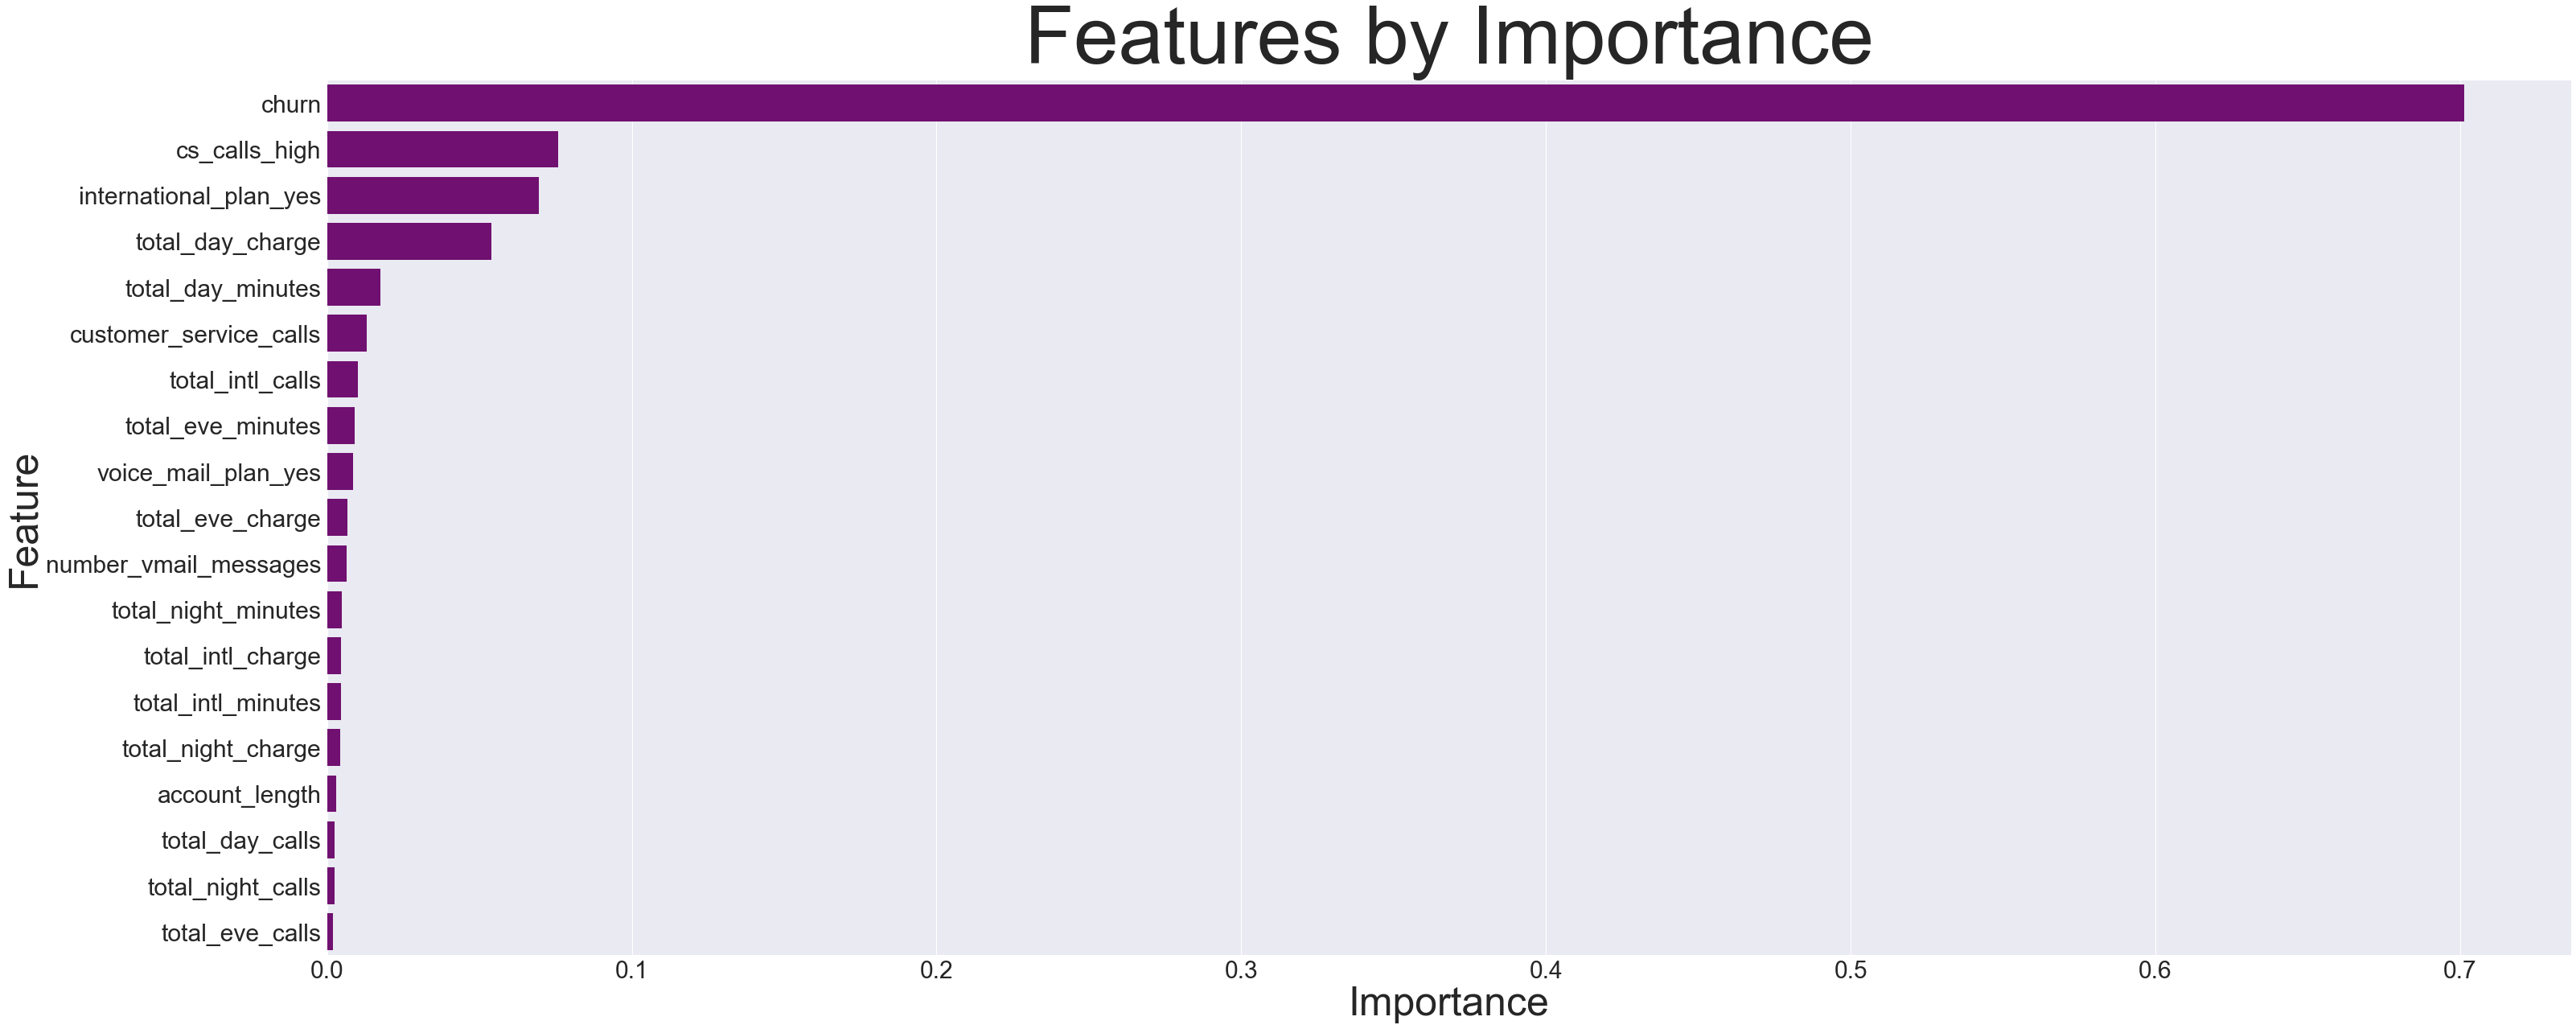

In [103]:
# plot feature importance
fig, ax = plt.subplots(figsize=(50,20))
#p = sns.barplot(data=feature_importance_df, x='Feature', y='Importance' );
p = sns.barplot(data=feature_importance_df, x='Importance', y='Feature', color='purple' );
p.set_xlabel("Importance", fontsize = 50)

p.set_ylabel("Feature", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#p.yaxis.set_major_formatter(display_millions)
p.set_title("Features by Importance", fontsize = 100)
plt.figsize=(30,20) 
#plt.savefig('images/project_1_bar_3')

plt.show();

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   number_vmail_messages   3333 non-null   int64  
 2   total_day_minutes       3333 non-null   float64
 3   total_day_calls         3333 non-null   int64  
 4   total_day_charge        3333 non-null   float64
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_eve_charge        3333 non-null   float64
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_night_charge      3333 non-null   float64
 11  total_intl_minutes      3333 non-null   float64
 12  total_intl_calls        3333 non-null   int64  
 13  total_intl_charge       3333 non-null   float64
 14  customer_service_calls  3333 non-null   

## Analysis
- Figure out how to rank feature importance as this is the ultimate outcome for my business problem.
- VISUALIZE!!!!

# Analysis of Churned Customer Key Categories

New as of 2/22 5PM

In [106]:
cleaned_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_yes,voice_mail_plan_yes,churn_1,cs_calls_high
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.0,1.0,0.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1.0,0.0,0.0,0.0


In [107]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   number_vmail_messages   3333 non-null   int64  
 2   total_day_minutes       3333 non-null   float64
 3   total_day_calls         3333 non-null   int64  
 4   total_day_charge        3333 non-null   float64
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_eve_charge        3333 non-null   float64
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_night_charge      3333 non-null   float64
 11  total_intl_minutes      3333 non-null   float64
 12  total_intl_calls        3333 non-null   int64  
 13  total_intl_charge       3333 non-null   float64
 14  customer_service_calls  3333 non-null   

In [108]:
analysis_df = cleaned_df[['total_day_calls','total_day_minutes', 'total_day_charge', 'total_eve_calls',
                          'total_eve_minutes', 'total_eve_charge', 'international_plan_yes', 'total_intl_calls',
                          'total_intl_charge','churn_1']]

In [114]:
analysis_df.sort_values('total_day_minutes', ascending=False).head(999)

,total_day_calls,total_day_minutes,total_day_charge,total_eve_calls,total_eve_minutes,total_eve_charge,international_plan_yes,total_intl_calls,total_intl_charge,churn_1
365,75,350.8,59.64,94,216.5,18.40,0.0,9,2.73,1.0
985,55,346.8,58.96,79,249.5,21.21,1.0,9,3.59,1.0
2594,81,345.3,58.70,106,203.4,17.29,1.0,8,3.19,1.0
156,120,337.4,57.36,116,227.4,19.33,0.0,7,4.27,1.0
605,77,335.5,57.04,109,212.5,18.06,0.0,8,3.43,1.0
975,118,334.3,56.83,104,192.1,16.33,0.0,6,2.81,1.0
15,67,332.9,56.59,97,317.8,27.01,0.0,9,1.46,1.0
1679,73,329.8,56.07,120,208.3,17.71,0.0,6,2.86,1.0
2028,106,328.1,55.78,89,151.7,12.89,0.0,3,2.35,1.0
197,67,326.5,55.51,113,176.3,14.99,0.0,6,2.89,1.0


In [116]:
#churned_df = analysis_df[analysis_df["churn_1"] == 1]
#churned_df

In [120]:
high_day_minutes_df = analysis_df[analysis_df["total_day_minutes"] >= 250]
low_day_minutes_df = analysis_df[analysis_df["total_day_minutes"] < 250]

In [121]:
high_day_minutes_df['churn_1'].value_counts()

0.0    174
1.0    154
Name: churn_1, dtype: int64

In [122]:
low_day_minutes_df['churn_1'].value_counts()

0.0    2676
1.0     329
Name: churn_1, dtype: int64

In [113]:
#analysis_df_2 = analysis_df.groupby('churn_1')['total_day_calls'].describe().sort_values('mean', ascending=False)
#analysis_df_2

# Archive

## Analysis of Churned Customers (Old)

In [ ]:
cleaned_df

In [ ]:
churned_df = cleaned_df[cleaned_df["churn_1"] == 1]
churned_df

In [ ]:
churned_df.info()

In [ ]:
churn_means = churned_df.mean()

In [ ]:
stayed_df = cleaned_df[cleaned_df["churn_1"] == 0]
stayed_df

In [ ]:
stayed_means = stayed_df.mean()

In [ ]:
stayed_means = stayed_means.reset_index()

In [ ]:
stayed_means = stayed_means.rename(columns={0: "Stayed"})

In [ ]:
stayed_means

In [ ]:
churn_means = churn_means.reset_index()

In [ ]:
churn_means = churn_means.rename(columns={0: "Left"})

In [ ]:
new_df = pd.merge(stayed_means, churn_means, on= 'index')
new_df.head()

In [ ]:
#new_df = new_df.drop(columns=['level_0_x', 'level_0_y'], axis=1)
#new_df.head()

In [ ]:
new_df['Delta']= new_df.apply(lambda x: x['Left'] - x['Stayed'], axis=1)

In [ ]:
new_df

In [ ]:
#churned_df.sort_values('cs_calls_4_5_6', ascending=False)

In [ ]:
churned_df.info()

In [ ]:
churned_df_cat = churned_df[['cs_calls_high','voice_mail_plan_yes', 'international_plan_yes']]
churned_df_cat


In [ ]:
churned_df_cat.sum()

In [ ]:
stayed_df_cat = stayed_df[['cs_calls_high','voice_mail_plan_yes', 'international_plan_yes']]
stayed_df_cat

In [ ]:
stayed_df_cat.sum()

In [ ]:
churned_df.info()

In [ ]:
churned_df_num = churned_df[['account_length', "number_vmail_messages", "total_day_calls", "total_eve_calls",
                             "total_night_minutes", "total_night_calls", "total_intl_calls",
                             "total_intl_minutes",]]

In [ ]:
#churned_df_num = churned_df[['account_length', "number_vmail_messages", "total_day_calls", "total_day_charge",
#                             "total_eve_calls", "total_eve_charge", "total_night_minutes", "total_night_calls",
#                             "total_night_charge", "total_intl_calls", "total_intl_minutes", "total_intl_charge"
#                            ]]

In [ ]:
stayed_df_num = stayed_df[['account_length', "number_vmail_messages", "total_day_calls", "total_eve_calls",
                             "total_night_minutes", "total_night_calls", "total_intl_calls",
                             "total_intl_minutes",]]

In [ ]:
#stayed_df_num = stayed_df[['account_length', "number_vmail_messages", "total_day_calls", "total_day_charge",
#                             "total_eve_calls", "total_eve_charge", "total_night_minutes", "total_night_calls",
#                             "total_night_charge", "total_intl_calls", "total_intl_minutes", "total_intl_charge"
#                            ]]

In [ ]:
churned_df_num.mean()

In [ ]:
churned_df_num.describe()

In [ ]:
stayed_df_num.mean()

In [ ]:
churned_df_num['total_day_charge'].value_counts()

In [ ]:
# Accuracy Score, AUC, & Confusion Matrix
print('DTree 1 Accuracy is :{0}'.format(dt1_acc))
print('DTree 2 Accuracy is :{0}'.format(dt2_acc))
print('Random Forests 1 Accuracy is :{0}'.format(rf1_acc))
print('Random Forests 2 Accuracy is :{0}'.format(rf2_acc))
print('----------------')
print('DTree 1 Precision is :{0}'.format(dt1_prec))
print('DTree 2 Precision is :{0}'.format(dt2_prec))
print('Random Forests 1 Precision is :{0}'.format(rf1_prec))
print('Random Forests 2 Precision is :{0}'.format(rf2_prec))
print('----------------')
print('DTree 1 Recall is :{0}'.format(dt1_rcl))
print('DTree 2 Recall is :{0}'.format(dt2_rcl))
print('Random Forests 1 Recall is :{0}'.format(rf1_rcl))
print('Random Forests 2 Recall is :{0}'.format(rf2_rcl))
print('----------------')
print('DTree 1 F1 Score is :{0}'.format(dt1_f1))
print('DTree 2 F1 Score is :{0}'.format(dt2_f1))
print('Random Forests 1 F1 Score is :{0}'.format(rf1_f1))
print('Random Forests 2 F1 Score is :{0}'.format(rf2_f1))
print('----------------')
print('DTree 1 AUC is :{0}'.format(round(dt1_roc_auc, 2)))
print('DTree 2 AUC is :{0}'.format(round(dt2_roc_auc, 2)))
print('Random Forests 1 AUC is :{0}'.format(round(rf1_roc_auc, 2)))
print('Random Forests 2 AUC is :{0}'.format(round(rf2_roc_auc, 2)))